# Proyecto Integrador 2023-2

Estudiantes :

* Juan Felipe Cardona Arango
* Juan Sebastian Sanin Villareal
* Samuel Ceballos Posada
* Daniela Ximena Niño Barbosa



# Fase I. Business Understanding
Definición de necesidades del cliente (comprensión del negocio)

## Contexto del negocio

El mercado de otorgar créditos financieros a personas es un mercado competitivo en el que las instituciones financieras compiten por captar clientes y generar ingresos. Las instituciones financieras que participan en este mercado deben tomar decisiones informadas sobre quién debe recibir un crédito y en qué condiciones.

Información Relacionada con la Toma de Decisiones:

* Datos del Solicitante: Las instituciones financieras recopilan información sobre los solicitantes de crédito, incluyendo sus ingresos, gastos, deudas existentes, historial crediticio y propósito del crédito. Esta información se utiliza para evaluar el riesgo crediticio del solicitante.
* Modelos de Crédito: Las instituciones financieras utilizan modelos de crédito para evaluar el riesgo crediticio de los solicitantes. Estos modelos utilizan datos históricos para predecir la probabilidad de que un solicitante de crédito incumpla.
* Reglas del Negocio: Las instituciones financieras tienen reglas del negocio que deben seguir al otorgar créditos. Estas reglas están diseñadas para proteger a las instituciones financieras del riesgo crediticio.

Decisiones Clave:

* Decisión de otorgar crédito: La decisión más importante que deben tomar las instituciones financieras es si otorgar o rechazar un crédito. Esta decisión se basa en la evaluación del riesgo crediticio del solicitante.
* Condiciones del crédito: Una vez que la institución financiera decide otorgar un crédito, debe negociar las condiciones del crédito con el solicitante. Estas condiciones incluyen el monto del crédito, el plazo del crédito, la tasa de interés y las garantías.

Optimizaciones:

* Automatización: Las instituciones financieras pueden utilizar la automatización para mejorar la eficiencia de su proceso de aprobación de crédito. Esto puede ayudar a reducir los costos y aumentar la velocidad de respuesta.
* Modelos de Crédito: Las instituciones financieras pueden utilizar modelos de crédito más avanzados para mejorar la precisión de sus evaluaciones de riesgo crediticio.
* Análisis de datos: Las instituciones financieras pueden utilizar el análisis de datos para identificar patrones y tendencias que pueden ser útiles para la toma de decisiones de crédito.

## Pregunta de negocio

El objetivo es responder a la siguiente pregunta de negocio:

*XXXXXXX*

## Reglas de negocio

Las reglas del negocio para otorgar o rechazar un crédito financiero son las siguientes:

* Capacidad de pago: El solicitante debe tener la capacidad de pagar el crédito, incluyendo los intereses y comisiones. Esto se puede evaluar considerando los ingresos, gastos, deudas existentes y otros compromisos financieros del solicitante.
* Historial crediticio: El solicitante debe tener un historial crediticio positivo. Esto se puede verificar en las centrales de riesgo.
* Propósito del crédito: El propósito del crédito debe ser legítimo y estar respaldado por un plan de negocios o personal claro.
* Garantías: El solicitante puede ofrecer garantías para respaldar el crédito. Esto puede incluir bienes inmuebles, vehículos o activos comerciales.


# Fase II. Data Understanding
Estudio y comprensión de los datos

## Librerías y lectura del dataset

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
random_state = 42

In [247]:
# # Access to Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [248]:
# Read the dataset using Pandas
df = pd.read_csv('train.csv')
df

C:\Users\samue\AppData\Local\Temp\ipykernel_544\3322559243.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## EDA

### Exploring the dataset

In [249]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [250]:
df.shape

(100000, 28)

In [251]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Observaciones:
1. Existen valores nulos en el dataset.
2. El dataset tiene variables numericas y strings.

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [254]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Observaciones:
1.	El campo Customer_ID tiene 12500 valores únicos, lo que significa que tenemos datos de 12500 clientes.
2. El campo Month tiene solo 8 valores únicos. Debemos analizar que meses están presentes.
3. El campo Age tiene 1788 valores únicos. Esto es una anomalía ya que únicamente hay edades de 0-100
4. El campo SSN tiene 12501 valores únicos, mientras que Customer_ID tiene solo 12500 valores únicos. Existe la posibilidad de que se haya ingresado un valor de SSN incorrecto para uno de los clientes, ya que la misma persona no puede tener múltiples SSN.

In [255]:
# Check missing value or incorrect data
for i in df:
  print('\n', i, df[i].unique())


 ID ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

 Name ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 SSN ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 

Observaciones:
1. Existen valores nulos.
2. Existen valores con caracteres incorrectos, por ejemplo, el valor 28_ en el campo Age.

### Visualizing missing values

In [256]:
df = df.replace(['None', 'nan', 'NaN'], np.nan)

In [257]:
# Missing values from each row
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

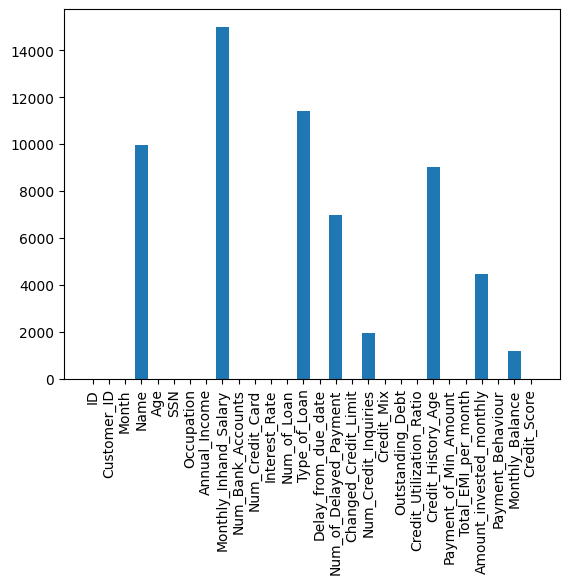

In [258]:
# Visualize the missing values
plt.bar(df.columns, list(df.isna().sum()))
plt.xticks(rotation = 90)
plt.show()

In [259]:
# Percentage of missing values
df.isnull().mean()*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

# Fase III. Data Preparation
Análisis de los datos y selección de características

## Transformación de los datos

### Borrar columnas y datos innecesarios

In [260]:
# Drop unnecesary columns
df = df.drop(df[['ID', 'Name', 'SSN', 'Type_of_Loan']], axis=1)

In [261]:
# Convert ID from hexadecimal to integer
df['Customer_ID'] = df['Customer_ID'].apply(lambda x: int(x[4:], 16))

In [262]:
# Replace character _ to blank in Payment_Behaviour
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('_',' ')
# Remove invalid characters
sym = "\\`*_{}[]()>#@+!$:;%"
for i in df.columns:
    for c in sym:
        df[i] = df[i].astype(str).str.replace(c,'')

In [263]:
df = df.replace(['None', 'nan', 'NaN'], np.nan)

In [264]:
# Replace empty strings with nan values
df = df.replace('', np.nan)

### Cambiar tipos de datos

In [265]:
# Transform the values in Payment_of_Min_Amount to numbers
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

In [266]:
# Transform the values in Credit_Mix to numbers
df['Credit_Mix'] = df['Credit_Mix'].astype(str).str.replace('Bad','1')
df['Credit_Mix'] = df['Credit_Mix'].astype(str).str.replace('Standard','2')
df['Credit_Mix'] = df['Credit_Mix'].astype(str).str.replace('Good','3')

In [267]:
# Transform the values in Credit_History_Age to numbers
def str_to_int(string):
    if string != 'nan':
        years = int(string[:string.index('.')])
        months = int(string[string.index('.')+1:])/12
        return(years + months)
    else:
        return np.nan

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace('Months','')
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: str_to_int(x))

In [268]:
# Transform the values in Payment_of_Min_Amount to numbers
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', '0')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('No', '1')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('Yes', '2')

In [269]:
# Transform the values in Payment_Behaviour to numbers
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low spent Small value payments','1')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low spent Medium value payments','2')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low spent Large value payments','3')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High spent Small value payments','4')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High spent Medium value payments','5')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High spent Large value payments','6')

In [270]:
# Transform the values in Credit_Score to numbers
df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('Poor','1')
df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('Standard','2')
df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('Good','3')

In [271]:
df = df.replace(['None', 'nan', 'NaN'], np.nan)

In [272]:
# Missing values from each row
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [273]:
# Convert datatypes
# Do not include data with missing values in int_cols
int_cols = ['Customer_ID', 'Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
            'Delay_from_due_date', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
float_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
              'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for i in int_cols:
    df[i] = df[i].astype(int)
for i in float_cols:
    df[i] = df[i].astype(float)

In [274]:
# Missing values from each row
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Reemplazar valores nulos de columnas de datos discretos/categoricos

In [275]:
df['Month'].value_counts()

Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

In [276]:
df['Age'].unique()

array([  23, -500,   28, ..., 4808, 2263, 1342])

In [277]:
for i in df['Customer_ID'].unique():
    mode = df[df['Customer_ID'] == i]['Age'].mode()[0]
    df.loc[df["Customer_ID"] == i, "Age"] = mode
df['Age'].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [278]:
def fill_nan_with_mode(df, groupby, column):
    # Fill with local mode
    fill_method = lambda x: pd.Series.mode(x).iat[0]
    mode_by_group = df.groupby(groupby)[column].transform(fill_method)
    df[column] = df[column].fillna(mode_by_group)

In [279]:
df['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'MediaManager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [280]:
fill_nan_with_mode(df, 'Customer_ID', 'Occupation')
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'MediaManager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [281]:
df['Credit_Mix'].unique()

array([nan, '3', '2', '1'], dtype=object)

In [282]:
fill_nan_with_mode(df, 'Customer_ID', 'Credit_Mix')
df['Credit_Mix'] = df['Credit_Mix'].astype(int)
df['Credit_Mix'].unique()

array([3, 2, 1])

In [283]:
df['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [284]:
df['Payment_Behaviour'].unique()

array([ 4,  3,  2,  1,  5, 98,  6])

In [285]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(98,np.nan)
fill_nan_with_mode(df, 'Customer_ID', 'Payment_Behaviour')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(int)
df['Payment_Behaviour'].unique()

array([4, 3, 2, 1, 5, 6])

In [286]:
df['Credit_Score'].unique()

array([3, 2, 1])

In [287]:
# Missing values from each row
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Reemplazar valores nulos y outliers de columnas de datos continuos

In [288]:
def remove_outliers(df, groupby, column):
    # Calcular la moda para cada grupo
    fill_method = lambda x: pd.Series.mode(x).iat[0]
    mode_result = df.groupby(groupby)[column].apply(fill_method)
    
    # Obtener el valor mínimo y máximo de la moda para cada grupo
    min_value = mode_result.min()
    max_value = mode_result.max()

    # Asignar valores incorrectos a NaN
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = np.nan

    # Llenar con la moda local
    fill_nan_with_mode(df, groupby, column)

In [289]:
df['Annual_Income'].value_counts(dropna=False)

Annual_Income
17816.75       16
22434.16       16
40341.16       16
17273.83       16
109945.32      16
               ..
17079092.00     1
1910572.00      1
20179076.00     1
7980216.00      1
8299495.00      1
Name: count, Length: 13487, dtype: int64

In [290]:
remove_outliers(df, 'Customer_ID', 'Annual_Income')

In [291]:
df['Monthly_Inhand_Salary'].value_counts(dropna=False)

Monthly_Inhand_Salary
NaN            15002
2295.058333       15
6082.187500       15
6769.130000       15
6358.956667       15
               ...  
1087.546445        1
3189.212103        1
5640.117744        1
7727.560450        1
2443.654131        1
Name: count, Length: 13236, dtype: int64

In [292]:
remove_outliers(df, 'Customer_ID', 'Monthly_Inhand_Salary')

In [293]:
df['Num_Bank_Accounts'].value_counts(dropna=False)

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [294]:
remove_outliers(df, 'Customer_ID', 'Num_Bank_Accounts')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].replace(-1.0, 0)

In [295]:
df['Num_Credit_Card'].value_counts(dropna=False)

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

In [296]:
remove_outliers(df, 'Customer_ID', 'Num_Credit_Card')

In [297]:
df['Interest_Rate'].value_counts(dropna=False)

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

In [298]:
remove_outliers(df, 'Customer_ID', 'Interest_Rate')

In [299]:
df['Num_of_Loan'].value_counts(dropna=False)

Num_of_Loan
3       15104
2       15032
4       14743
0       10930
1       10606
        ...  
119         1
321         1
1439        1
663         1
966         1
Name: count, Length: 414, dtype: int64

In [300]:
remove_outliers(df, 'Customer_ID', 'Num_of_Loan')

In [301]:
df['Delay_from_due_date'].value_counts(dropna=False)

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

In [302]:
remove_outliers(df, 'Customer_ID', 'Delay_from_due_date')

In [303]:
df['Num_of_Delayed_Payment'].value_counts(dropna=False)

Num_of_Delayed_Payment
NaN     7002
19      5481
17      5412
16      5312
10      5309
        ... 
1534       1
3739       1
3313       1
4191       1
2047       1
Name: count, Length: 712, dtype: int64

In [304]:
remove_outliers(df, 'Customer_ID', 'Num_of_Delayed_Payment')

In [305]:
df['Changed_Credit_Limit'].value_counts(dropna=False)

Changed_Credit_Limit
 NaN      2091
 8.22      133
 11.50     127
 11.32     126
 7.35      121
          ... 
-1.84        1
 0.89        1
 28.06       1
 1.56        1
 21.17       1
Name: count, Length: 4384, dtype: int64

In [306]:
remove_outliers(df, 'Customer_ID', 'Changed_Credit_Limit')

In [307]:
df['Num_Credit_Inquiries'].value_counts(dropna=False)

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1224, dtype: int64

In [308]:
remove_outliers(df, 'Customer_ID', 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(float).astype(int)

In [309]:
df['Outstanding_Debt'].value_counts(dropna=False)

Outstanding_Debt
1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [310]:
remove_outliers(df, 'Customer_ID', 'Outstanding_Debt')

In [311]:
df['Credit_Utilization_Ratio'].value_counts(dropna=False)

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64

In [312]:
df['Credit_Utilization_Ratio'].isna().sum()

0

In [313]:
df['Credit_History_Age'].value_counts(dropna=False)

Credit_History_Age
NaN          9030
15.916667     446
19.333333     445
19.416667     444
17.916667     443
             ... 
0.250000       20
0.166667       15
33.583333      14
33.666667      12
0.083333        2
Name: count, Length: 405, dtype: int64

In [314]:
df['Credit_History_Age'] = df.groupby('Customer_ID', group_keys=False)['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

In [315]:
df['Total_EMI_per_month'].value_counts(dropna=False)

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64

In [316]:
remove_outliers(df, 'Customer_ID', 'Total_EMI_per_month')

In [317]:
df['Amount_invested_monthly'].value_counts(dropna=False)

Amount_invested_monthly
NaN             4479
10000.000000    4305
0.000000         169
36.662351          1
89.738489          1
                ... 
36.541909          1
93.451163          1
140.809722         1
38.739377          1
167.163865         1
Name: count, Length: 91050, dtype: int64

In [318]:
remove_outliers(df, 'Customer_ID', 'Amount_invested_monthly')

In [319]:
df['Monthly_Balance'].value_counts(dropna=False)

Monthly_Balance
 NaN             1200
-3.333333e+26       9
 3.124941e+02       1
 3.474139e+02       1
 2.549709e+02       1
                 ... 
 3.662890e+02       1
 1.511883e+02       1
 3.067503e+02       1
 2.788720e+02       1
 3.936737e+02       1
Name: count, Length: 98793, dtype: int64

In [320]:
remove_outliers(df, 'Customer_ID', 'Monthly_Balance')

### Change datatypes

In [321]:
# Convert datatypes
int_cols = ['Customer_ID', 'Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
            'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
            'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
float_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit',
              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
              'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for i in int_cols:
    df[i] = df[i].astype(int)
for i in float_cols:
    df[i] = df[i].astype(float)

# Fase IV. Modeling

## Funciones de ayuda

In [322]:
def calculate_mode(lst):
    if not lst:
        return None
    return statistics.mode(lst)

In [323]:
def preprocessor(data):
    # Step 1: Data Preprocessing
    data = data.sort_values(by=['Customer_ID', 'Month'])

    # Encoding categorical values
    categorical_columns = [cname for cname in data.columns if data[cname].nunique() and data[cname].dtype == "object"]

    ordinal_encoder = OrdinalEncoder()
    data[categorical_columns] = ordinal_encoder.fit_transform(data[categorical_columns])
    return data

In [324]:
def client_summary(data, target_month, num_prev_months):
    months = [1, 2, 3, 4, 5, 6, 7, 8]
    start_index = months.index(target_month) - num_prev_months
    start_index = max(0, start_index)
    previous_months = months[start_index:months.index(target_month)]

    agg_data = data[data['Month'].between(previous_months[0], previous_months[-1], inclusive='both')].groupby('Customer_ID').agg({
        'Age'                      :'mean',
        'Occupation'               : list,
        'Annual_Income'            :'mean',
        'Monthly_Inhand_Salary'    :'mean',
        'Num_Bank_Accounts'        :'mean',
        'Num_Credit_Card'          :'mean',
        'Interest_Rate'            :'mean',
        'Num_of_Loan'              :'mean',
        'Delay_from_due_date'      :'mean',
        'Num_of_Delayed_Payment'   :'mean',
        'Changed_Credit_Limit'     :'mean',
        'Num_Credit_Inquiries'     :'mean',
        'Credit_Mix'               :'mean',
        'Outstanding_Debt'         :'mean',
        'Credit_Utilization_Ratio' :'mean',
        'Credit_History_Age'       :'mean',
        'Payment_of_Min_Amount'    : list,
        'Total_EMI_per_month'      :'mean',
        'Amount_invested_monthly'  :'mean',
        'Payment_Behaviour'        :'mean',
        'Monthly_Balance'          :'mean',
        'Credit_Score'             : list   # List of credit scores for months 1 to 7
    }).reset_index()


    # Expand the list of credit scores into separate columns
    expanded_scores = agg_data['Credit_Score'].apply(pd.Series)
    expanded_scores.columns = [f'Credit_Score_{i}' for i in range(num_prev_months)]
    agg_data = pd.concat([agg_data, expanded_scores], axis=1)
    agg_data.drop('Credit_Score', axis=1, inplace=True)

    # Calculate mode for categorical variables
    agg_data['Occupation'] = agg_data['Occupation'].apply(calculate_mode)
    agg_data['Payment_of_Min_Amount'] = agg_data['Payment_of_Min_Amount'].apply(calculate_mode)

    # Target variable
    target_month_data = data[data['Month'] == target_month]
    target_month_data = target_month_data[["Customer_ID", "Credit_Score"]].rename(columns={'Credit_Score': 'Target_Score'})

    # Merge data and target
    agg_data = agg_data.merge(target_month_data, on="Customer_ID", how="inner")

    agg_data = agg_data.drop(['Customer_ID'], axis=1)

    return agg_data

In [325]:
def train_valid_test(data, test_month, prev_months):
    df_train = client_summary(data, prev_months+1, prev_months)
    for month in range(prev_months+2, test_month-1):
        summary = client_summary(data, month, prev_months)
        df_train = pd.merge(df_train, summary, how='outer')
    df_val = client_summary(data, test_month-1, prev_months)
    df_test = client_summary(data, test_month, prev_months)

    X_train, y_train = df_train.drop(['Target_Score'], axis=1), df_train['Target_Score']
    X_val, y_val = df_val.drop(['Target_Score'], axis=1), df_val['Target_Score']
    X_test, y_test = df_test.drop(['Target_Score'], axis=1), df_test['Target_Score']

    return X_train, X_val, X_test, y_train, y_val, y_test

## Validación de los modelos usando distintas cantidades de meses

### Funciones de prueba de modelos

In [326]:
def train_lr(X_train, y_train):
    # Parametros para ser evaluados
    param_grid = {
        'classifier__C': np.logspace(-4, 4, 50),
        'classifier__max_iter': [100, 1000],
    }
    # Modelo a usar
    model = LogisticRegression(random_state=random_state, class_weight='balanced')
    # Pipeline a usar
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    # Buscar los mejores parámetros
    lr = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1', verbose=0)
    lr.fit(X_train, y_train)
    return lr

In [327]:
def train_lr_ridge(X_train, y_train):
    # Parametros para ser evaluados
    param_grid = {
        'classifier__C': np.logspace(-4, 4, 50),
        'classifier__max_iter': [100, 1000],
    }
    # Modelo a usar
    model = LogisticRegression(random_state=random_state, class_weight='balanced', penalty='l2', solver='lbfgs')
    # Pipeline a usar
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    # Buscar los mejores parámetros
    lr = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1', verbose=0)
    lr.fit(X_train, y_train)
    return lr

In [328]:
def train_lr_lasso(X_train, y_train):
    # Parametros para ser evaluados
    param_grid = {
        'classifier__C': np.logspace(-4, 4, 50),
        'classifier__max_iter': [100, 1000],
    }
    # Modelo a usar
    model = LogisticRegression(random_state=random_state, class_weight='balanced', penalty='l1', solver='liblinear')
    # Pipeline a usar
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    # Buscar los mejores parámetros
    lr = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1', verbose=0)
    lr.fit(X_train, y_train)
    return lr

In [329]:
def train_knn(X_train, y_train):
    param_grid = {
      'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    }
    model = KNeighborsClassifier()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    knn = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1')
    knn.fit(X_train, y_train)
    return knn

In [330]:
def train_lda(X_train, y_train):
    param_grid = {
        'classifier__solver': ['svd', 'lsqr', 'eigen'],
    }
    model = LinearDiscriminantAnalysis()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    lda = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1')
    lda.fit(X_train, y_train)
    return lda

In [331]:
def train_qda(X_train, y_train):
    param_grid = {
        'classifier__reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]
    }
    model = QuadraticDiscriminantAnalysis()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    qda = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1')
    qda.fit(X_train, y_train)
    return qda

In [332]:
def train_nb(X_train, y_train):
    param_grid = {
        'classifier__var_smoothing': np.logspace(0,-9, num=100)
    }
    model = GaussianNB()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model),
    ])
    nb = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'f1')
    nb.fit(X_train, y_train)
    return nb

### Funciones para imprimir métricas

In [333]:
def clf_report_models(lr, lr_ridge, lr_lasso, knn, lda, qda, nb, X_val, y_val, months):
    for i in range(6):
        if i == 0:
            print(f'Logistic Regression - {months} prev months')
            y_pred = lr.predict(X_val)
        elif i == 1:
            print(f'\nLogistic Regression Ridge - {months} prev months')
            y_pred = lr_ridge.predict(X_val)
        elif i == 2:
            print(f'\nLogistic Regression Lasso - {months} prev months')
            y_pred = lr_lasso.predict(X_val)
        elif i == 3:
            print(f'\nKNN - {months} prev months')
            y_pred = knn.predict(X_val)
        elif i == 4:
            print(f'\nLDA - {months} prev months')
            y_pred = lda.predict(X_val)
        elif i == 5:
            print(f'\nQDA - {months} prev months')
            y_pred = qda.predict(X_val)
        elif i == 6:
            print(f'\nNaive Bayes - {months} prev months')
            y_pred = nb.predict(X_val)
        print(classification_report(y_val, y_pred))

In [334]:
def roc(X_test, y_test, clf, num_classes, classes, model, months):
    # Obtener las puntuaciones de decisión para el conjunto de prueba
    y_score = clf.predict_proba(X_test)

    # Binarizar las etiquetas
    y_test_bin = label_binarize(y_test, classes=classes)

    # Calcular la curva ROC para cada clase
    fpr = dict(); tpr = dict(); roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular el micro-average ROC curve y AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot the ROC curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})',
            color='deeppink', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'ROC curve (class {i+1}, AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.03, 1.03])
    plt.ylim([-0.03, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model} using {months} previous months')
    plt.legend(loc="lower right")
    plt.show()

In [335]:
# def table_of_metrics(models, X, y):
#     accuracy_scores = np.zeros(len(models)*len(models[0]), dtype=float)
#     recall_scores = np.zeros(len(models)*len(models[0]), dtype=float)
#     precision_scores = np.zeros(len(models)*len(models[0]), dtype=float)
#     f1_scores = np.zeros(len(models)*len(models[0]), dtype=float)

#     for i in range(len(models)):
#         for j in range(len(models[0])):
#             y_pred = models[i][j].predict(X[i])
#             accuracy_scores[i] = accuracy_score(y[i], y_pred)
#             recall_scores[i] = recall_score(y[i], y_pred, average='weighted', labels=np.unique(y_pred))
#             precision_scores[i] = precision_score(y[i], y_pred, average='weighted', labels=np.unique(y_pred))
#             f1_scores[i] = f1_score(y[i], y_pred, average='weighted', labels=np.unique(y_pred))

#     metrics = [accuracy_scores, recall_scores, precision_scores, f1_scores]
#     return metrics

### Dividir datasets por meses

In [336]:
# Data processing
df = preprocessor(data=df)
month_to_pred = 8
prev_months_to_pred = [3, 4, 5, 6]

In [339]:
X_train_3, X_val_3, X_test_3, y_train_3, y_val_3, y_test_3 = train_valid_test(df, month_to_pred, prev_months_to_pred[0])
X_train_4, X_val_4, X_test_4, y_train_4, y_val_4, y_test_4 = train_valid_test(df, month_to_pred, prev_months_to_pred[1])
X_train_5, X_val_5, X_test_5, y_train_5, y_val_5, y_test_5 = train_valid_test(df, month_to_pred, prev_months_to_pred[2])
X_train_6, X_val_6, X_test_6, y_train_6, y_val_6, y_test_6 = train_valid_test(df, month_to_pred, prev_months_to_pred[3])

### PCA

In [355]:
# 3 meses
scaler = StandardScaler()
X_train_3_std = scaler.fit_transform(X_train_3)
X_val_3_std = scaler.transform(X_val_3)
X_test_3_std = scaler.transform(X_test_3)

pca_3 = PCA()
X_train_3_pca = pca_3.fit_transform(X_train_3_std)
X_val_3_pca = pca_3.transform(X_val_3_std)
X_test_3_pca = pca_3.transform(X_test_3_std)

# 4 meses
scaler = StandardScaler()
X_train_4_std = scaler.fit_transform(X_train_4)
X_val_4_std = scaler.transform(X_val_4)
X_test_4_std = scaler.transform(X_test_4)

pca_4 = PCA()
X_train_4_pca = pca_4.fit_transform(X_train_4_std)
X_val_4_pca = pca_4.transform(X_val_4_std)
X_test_4_pca = pca_4.transform(X_test_4_std)

# 5 meses
scaler = StandardScaler()
X_train_5_std = scaler.fit_transform(X_train_5)
X_val_5_std = scaler.transform(X_val_5)
X_test_5_std = scaler.transform(X_test_5)

pca_5 = PCA()
X_train_5_pca = pca_5.fit_transform(X_train_5_std)
X_val_5_pca = pca_5.transform(X_val_5_std)
X_test_5_pca = pca_5.transform(X_test_5_std)

# 6 meses
scaler = StandardScaler()
X_train_6_std = scaler.fit_transform(X_train_6)
X_val_6_std = scaler.transform(X_val_6)
X_test_6_std = scaler.transform(X_test_6)

pca_6 = PCA()
X_train_6_pca = pca_6.fit_transform(X_train_6_std)
X_val_6_pca = pca_6.transform(X_val_6_std)
X_test_6_pca = pca_6.transform(X_test_6_std)

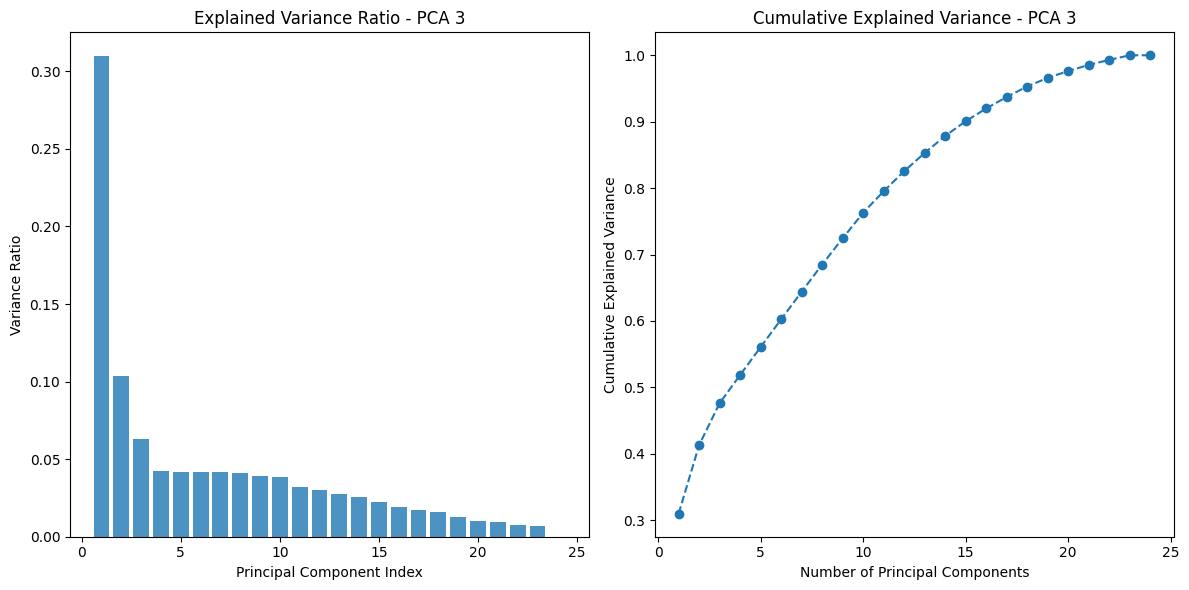

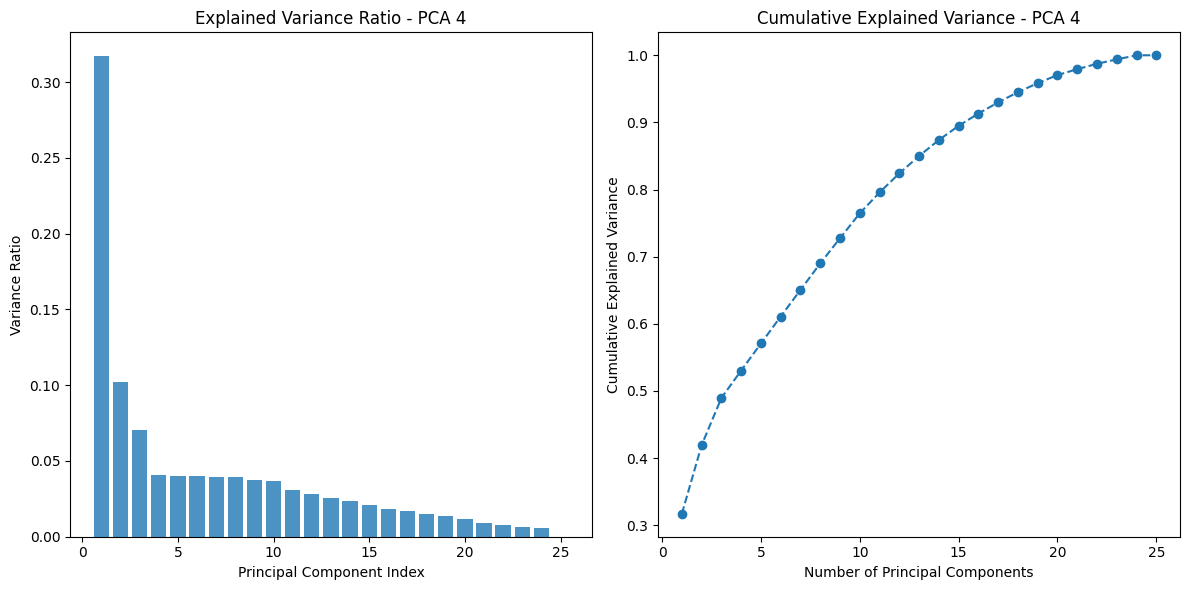

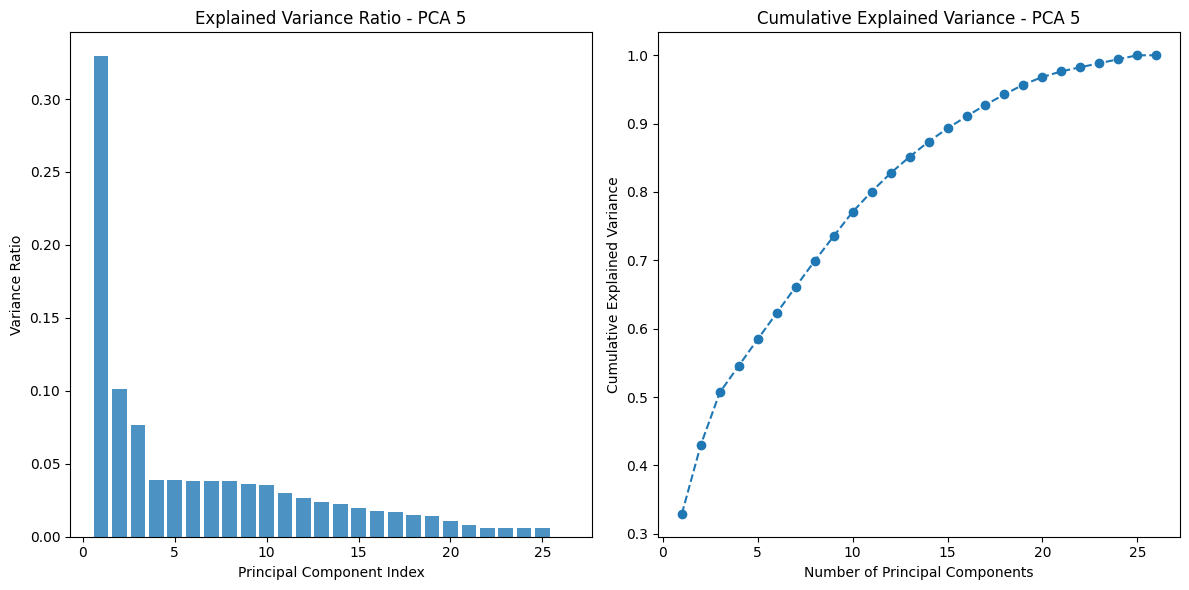

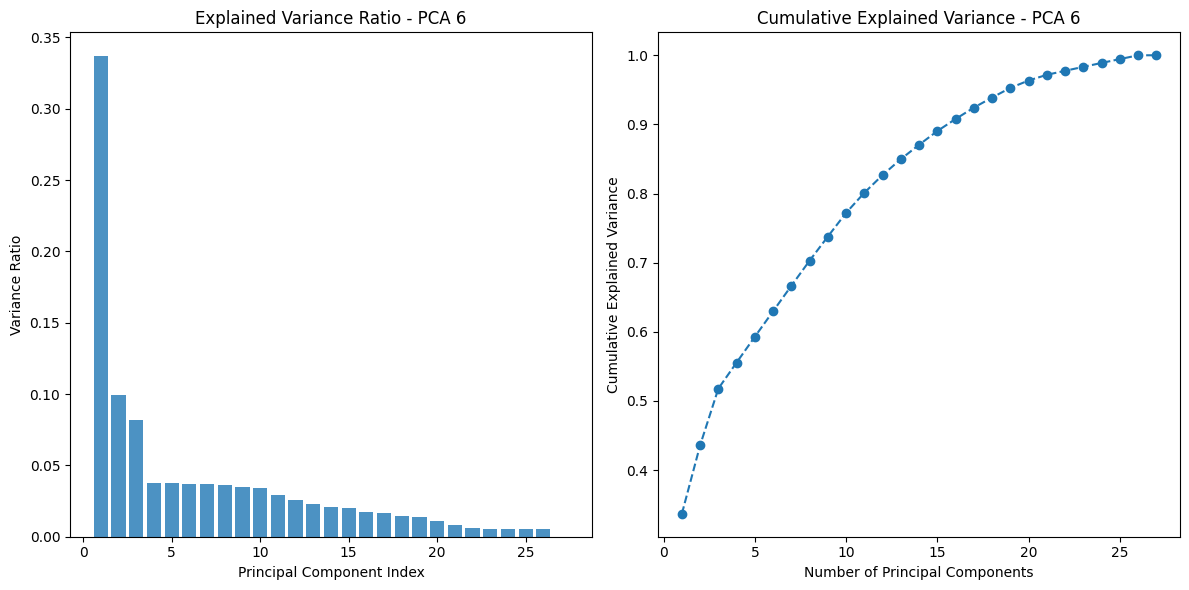

In [356]:
pca_list = [pca_3, pca_4, pca_5, pca_6]

# Scree plot
for i in range(len(pca_list)):
    explained_variance_ratio = pca_list[i].explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(12, 6))

    # Plot explained variance ratio
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
    plt.title(f'Explained Variance Ratio - PCA {i+3}')
    plt.xlabel('Principal Component Index')
    plt.ylabel('Variance Ratio')

    # Plot cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.title(f'Cumulative Explained Variance - PCA {i+3}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')

    plt.tight_layout()
    plt.show()

In [358]:
# Choose the number of components based on the scree plot
components_to_keep = 3

# 3 meses
X_train_3_pca = X_train_3_pca[:, :components_to_keep]
X_val_3_pca = X_val_3_pca[:, :components_to_keep]
X_test_3_pca = X_test_3_pca[:, :components_to_keep]

# 4 meses
X_train_4_pca = X_train_4_pca[:, :components_to_keep]
X_val_4_pca = X_val_4_pca[:, :components_to_keep]
X_test_4_pca = X_test_4_pca[:, :components_to_keep]

# 5 meses
X_train_5_pca = X_train_5_pca[:, :components_to_keep]
X_val_5_pca = X_val_5_pca[:, :components_to_keep]
X_test_5_pca = X_test_5_pca[:, :components_to_keep]

# 6 meses
X_train_6_pca = X_train_6_pca[:, :components_to_keep]
X_val_6_pca = X_val_6_pca[:, :components_to_keep]
X_test_6_pca = X_test_6_pca[:, :components_to_keep]

### Entrenamiento

In [359]:
lr_3 = train_lr(X_train_3_pca, y_train_3)
lr_ridge_3 = train_lr_ridge(X_train_3_pca, y_train_3)
lr_lasso_3 = train_lr_lasso(X_train_3_pca, y_train_3)
knn_3 = train_knn(X_train_3_pca, y_train_3)
lda_3 = train_lda(X_train_3_pca, y_train_3)
qda_3 = train_qda(X_train_3_pca, y_train_3)
nb_3 = train_nb(X_train_3_pca, y_train_3)

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan na

In [360]:
lr_4 = train_lr(X_train_4_pca, y_train_4)
lr_ridge_4 = train_lr_ridge(X_train_4_pca, y_train_4)
lr_lasso_4 = train_lr_lasso(X_train_4_pca, y_train_4)
knn_4 = train_knn(X_train_4_pca, y_train_4)
lda_4 = train_lda(X_train_4_pca, y_train_4)
qda_4 = train_qda(X_train_4_pca, y_train_4)
nb_4 = train_nb(X_train_4_pca, y_train_4)

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan na

In [361]:
lr_5 = train_lr(X_train_5_pca, y_train_5)
lr_ridge_5 = train_lr_ridge(X_train_5_pca, y_train_5)
lr_lasso_5 = train_lr_lasso(X_train_5_pca, y_train_5)
knn_5 = train_knn(X_train_5_pca, y_train_5)
lda_5 = train_lda(X_train_5_pca, y_train_5)
qda_5 = train_qda(X_train_5_pca, y_train_5)
nb_5 = train_nb(X_train_5_pca, y_train_5)

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan na

In [362]:
lr_6 = train_lr(X_train_6_pca, y_train_6)
lr_ridge_6 = train_lr_ridge(X_train_6_pca, y_train_6)
lr_lasso_6 = train_lr_lasso(X_train_6_pca, y_train_6)
knn_6 = train_knn(X_train_6_pca, y_train_6)
lda_6 = train_lda(X_train_6_pca, y_train_6)
qda_6 = train_qda(X_train_6_pca, y_train_6)
nb_6 = train_nb(X_train_6_pca, y_train_6)

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan na

### Comparación entre modelos

In [363]:
models = [[lr_3, lr_ridge_3, lr_lasso_3, knn_3, lda_3, qda_3, nb_3],
          [lr_4, lr_ridge_4, lr_lasso_4, knn_4, lda_4, qda_4, nb_4],
          [lr_5, lr_ridge_5, lr_lasso_5, knn_5, lda_5, qda_5, nb_5],
          [lr_6, lr_ridge_6, lr_lasso_6, knn_6, lda_6, qda_6, nb_6]]
X_val_ds = [X_val_3_pca, X_val_4_pca, X_val_5_pca, X_val_6_pca]
y_val_ds = [y_val_3, y_val_4, y_val_5, y_val_6]
model_names = ['Logistic regression', 'Ridge', 'Lasso', 'KNN', 'LDA', 'QDA', 'NB']
num_classes = 3
classes = [1, 2, 3]

#### Tabla de métricas

In [ ]:
# metrics_table = table_of_metrics(models, X_val_ds, y_val_ds)
# metrics_table

In [364]:
for i in range(len(prev_months_to_pred)):
    clf_report_models(models[i][0], models[i][1], models[i][2], models[i][3], models[i][4], models[i][5], models[i][6], X_val_ds[i], y_val_ds[i], prev_months_to_pred[i])

Logistic Regression - 3 prev months
              precision    recall  f1-score   support

           1       0.71      0.86      0.78      3614
           2       0.82      0.62      0.71      6475
           3       0.62      0.82      0.71      2411

    accuracy                           0.73     12500
   macro avg       0.72      0.77      0.73     12500
weighted avg       0.75      0.73      0.73     12500


Logistic Regression Ridge - 3 prev months
              precision    recall  f1-score   support

           1       0.71      0.86      0.78      3614
           2       0.82      0.62      0.71      6475
           3       0.62      0.82      0.71      2411

    accuracy                           0.73     12500
   macro avg       0.72      0.77      0.73     12500
weighted avg       0.75      0.73      0.73     12500


Logistic Regression Lasso - 3 prev months
              precision    recall  f1-score   support

           1       0.51      0.77      0.61      3614
       

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           1       0.70      0.78      0.73      3614
           2       0.75      0.70      0.72      6475
           3       0.69      0.70      0.70      2411

    accuracy                           0.72     12500
   macro avg       0.71      0.73      0.72     12500
weighted avg       0.72      0.72      0.72     12500


LDA - 3 prev months
              precision    recall  f1-score   support

           1       0.73      0.79      0.76      3614
           2       0.77      0.72      0.74      6475
           3       0.70      0.73      0.72      2411

    accuracy                           0.74     12500
   macro avg       0.73      0.75      0.74     12500
weighted avg       0.74      0.74      0.74     12500


QDA - 3 prev months
              precision    recall  f1-score   support

           1       0.73      0.79      0.76      3614
           2       0.76      0.73      0.74      6475
           3       0.71      0.71

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           1       0.70      0.79      0.74      3614
           2       0.75      0.69      0.72      6475
           3       0.67      0.70      0.69      2411

    accuracy                           0.72     12500
   macro avg       0.71      0.73      0.72     12500
weighted avg       0.72      0.72      0.72     12500


LDA - 4 prev months
              precision    recall  f1-score   support

           1       0.73      0.81      0.77      3614
           2       0.78      0.72      0.75      6475
           3       0.71      0.73      0.72      2411

    accuracy                           0.75     12500
   macro avg       0.74      0.76      0.75     12500
weighted avg       0.75      0.75      0.75     12500


QDA - 4 prev months
              precision    recall  f1-score   support

           1       0.73      0.80      0.76      3614
           2       0.77      0.73      0.75      6475
           3       0.71      0.71

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           1       0.71      0.79      0.75      3614
           2       0.76      0.69      0.72      6475
           3       0.67      0.71      0.69      2411

    accuracy                           0.72     12500
   macro avg       0.71      0.73      0.72     12500
weighted avg       0.73      0.72      0.72     12500


LDA - 5 prev months
              precision    recall  f1-score   support

           1       0.73      0.81      0.77      3614
           2       0.78      0.72      0.75      6475
           3       0.71      0.73      0.72      2411

    accuracy                           0.75     12500
   macro avg       0.74      0.75      0.74     12500
weighted avg       0.75      0.75      0.75     12500


QDA - 5 prev months
              precision    recall  f1-score   support

           1       0.73      0.80      0.76      3614
           2       0.77      0.73      0.75      6475
           3       0.71      0.70

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           1       0.80      0.84      0.82      3614
           2       0.83      0.82      0.82      6475
           3       0.80      0.77      0.78      2411

    accuracy                           0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.82      0.81      0.81     12500


LDA - 6 prev months
              precision    recall  f1-score   support

           1       0.73      0.78      0.76      3614
           2       0.75      0.74      0.74      6475
           3       0.71      0.65      0.68      2411

    accuracy                           0.73     12500
   macro avg       0.73      0.72      0.73     12500
weighted avg       0.73      0.73      0.73     12500


QDA - 6 prev months
              precision    recall  f1-score   support

           1       0.73      0.79      0.76      3614
           2       0.75      0.73      0.74      6475
           3       0.70      0.66

#### Curvas ROC

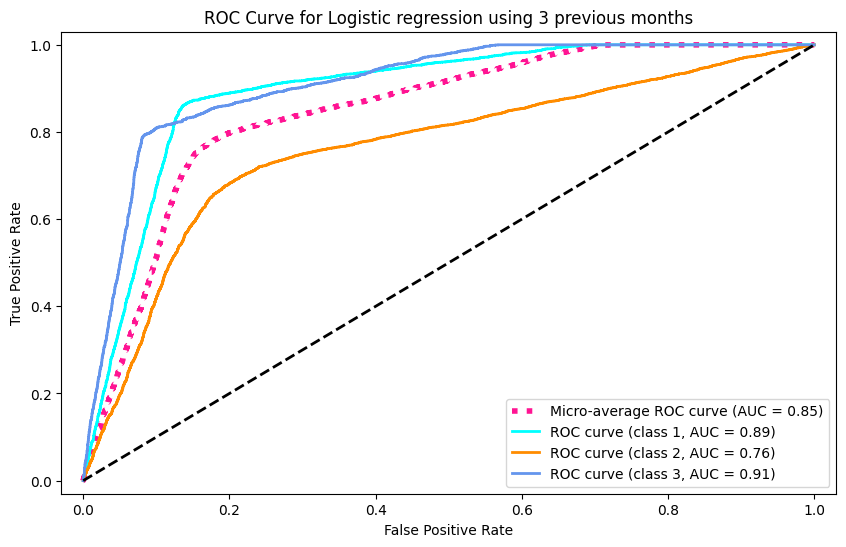

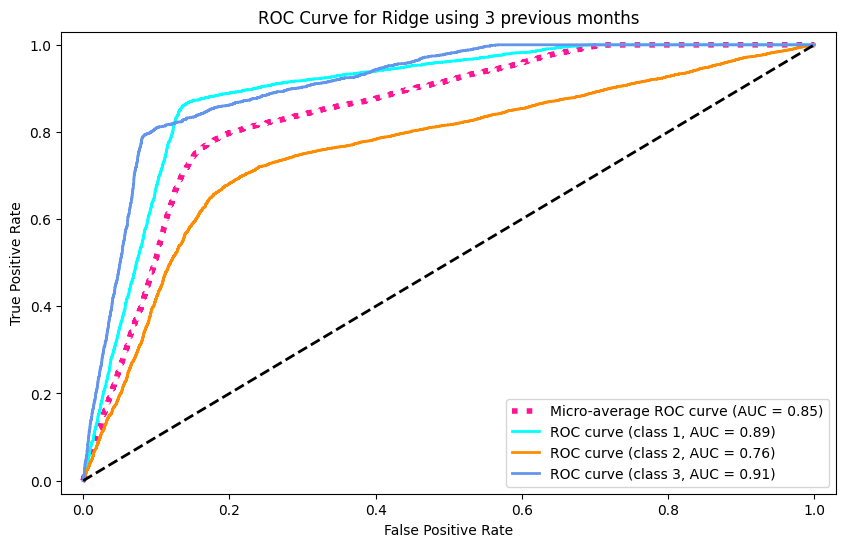

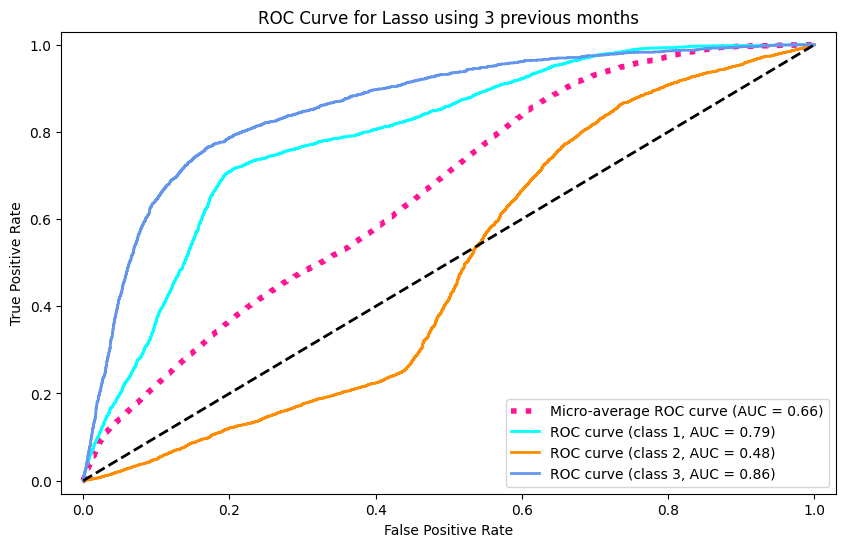

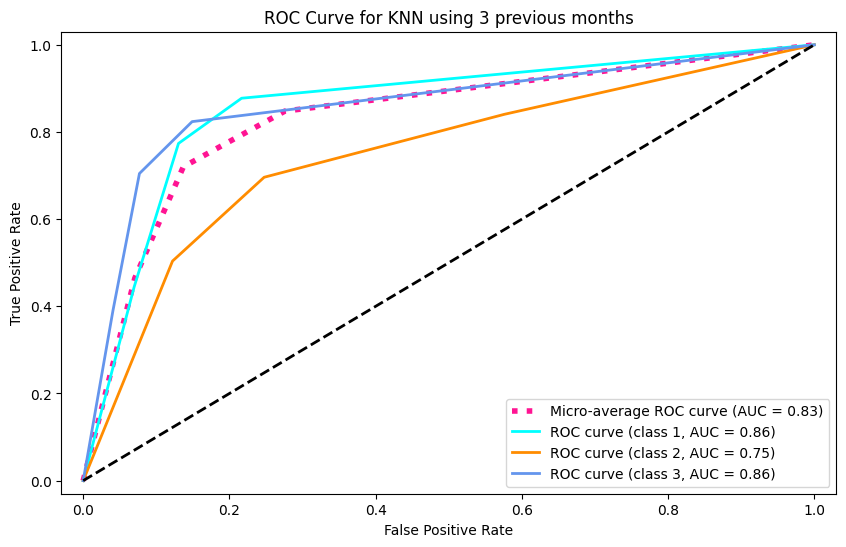

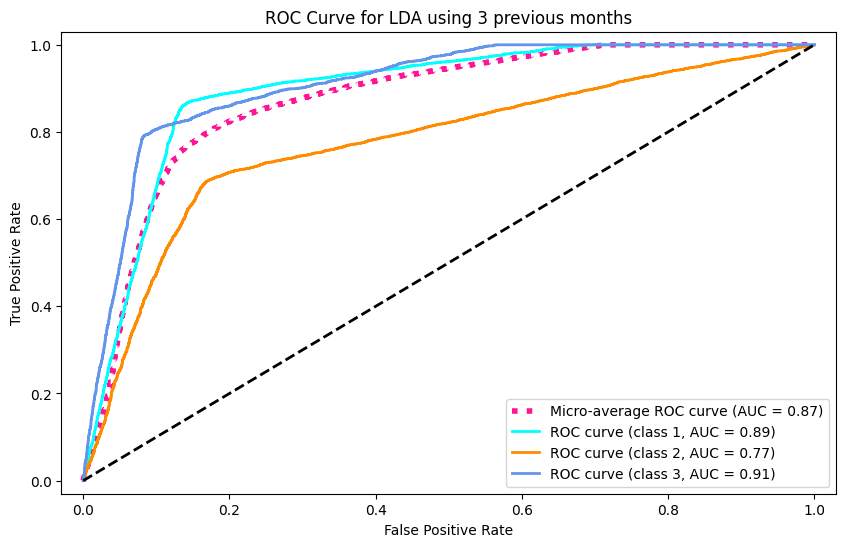

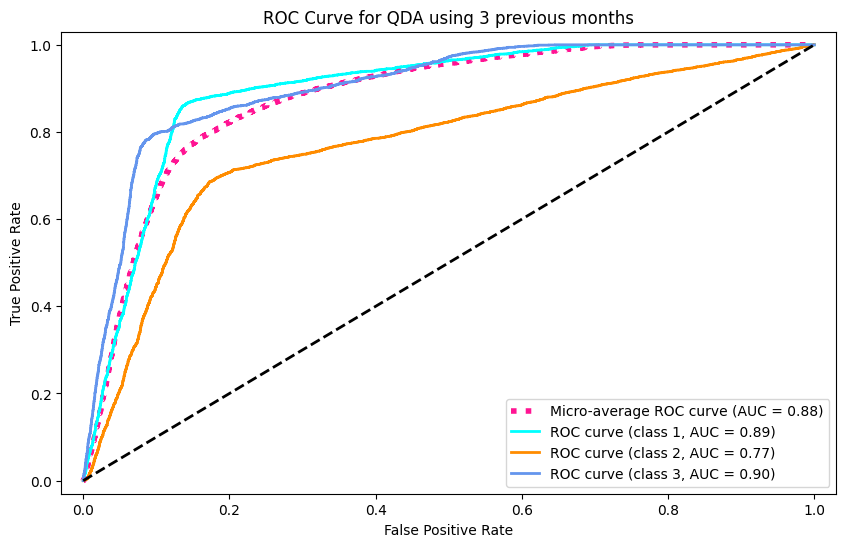

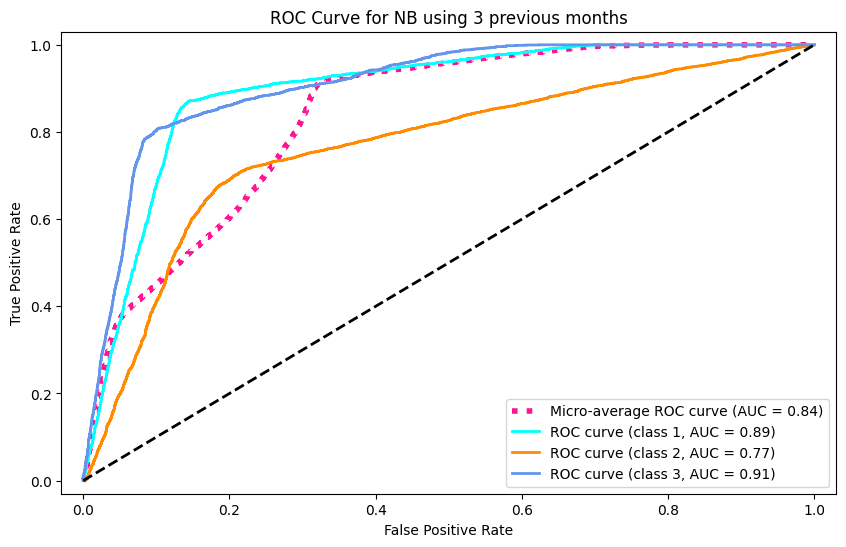

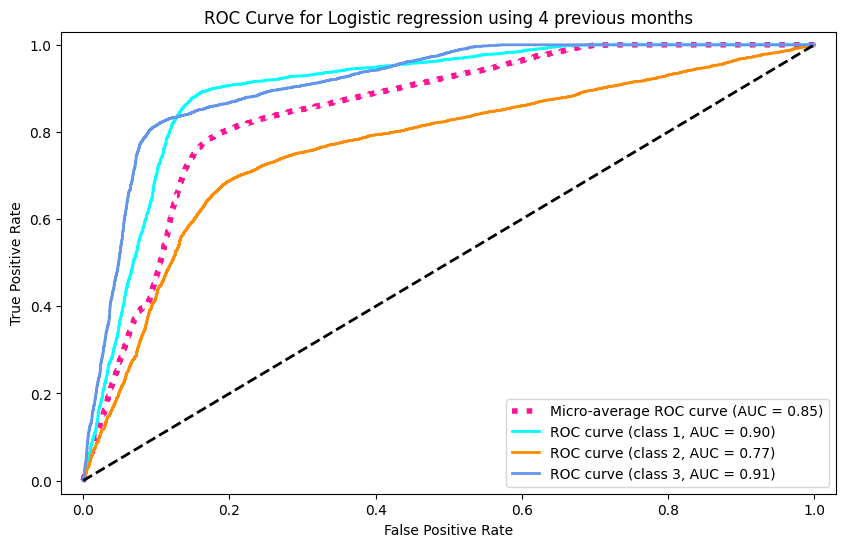

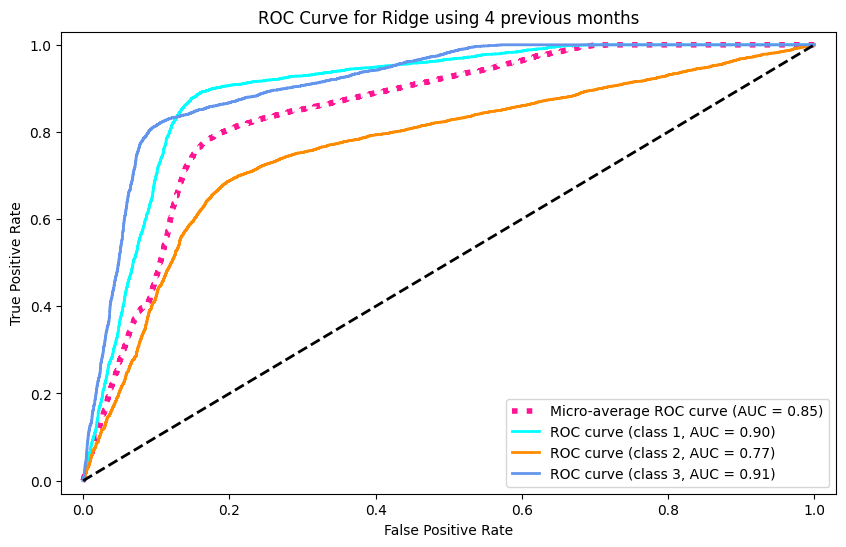

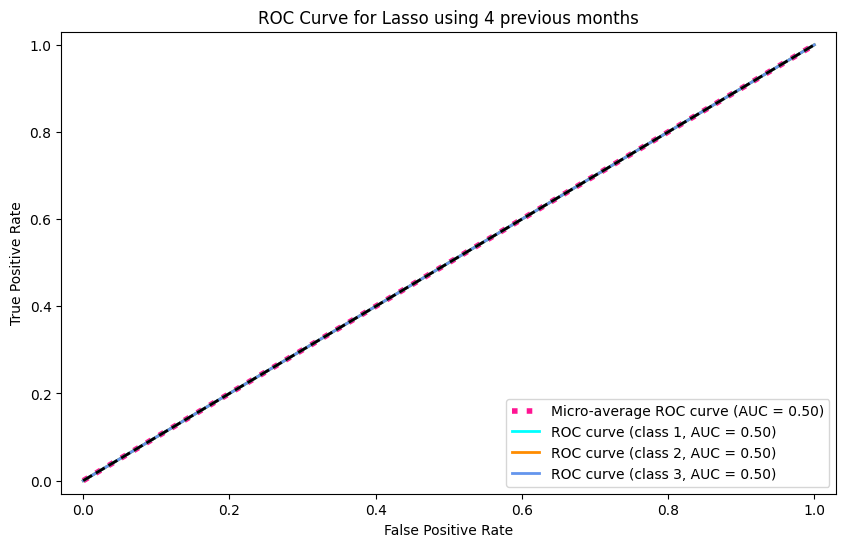

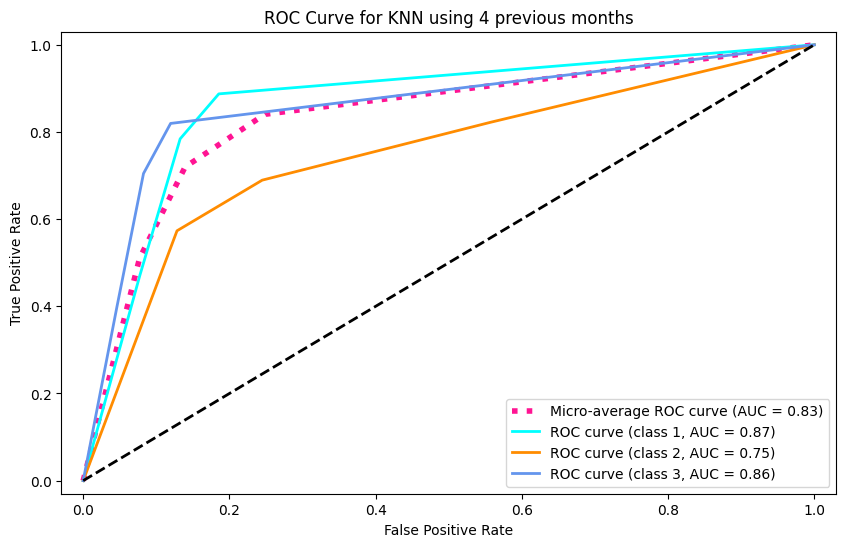

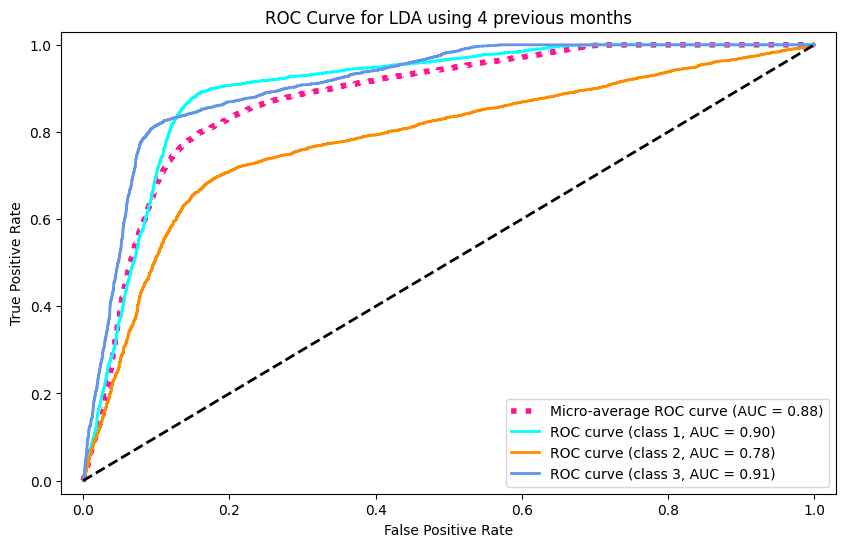

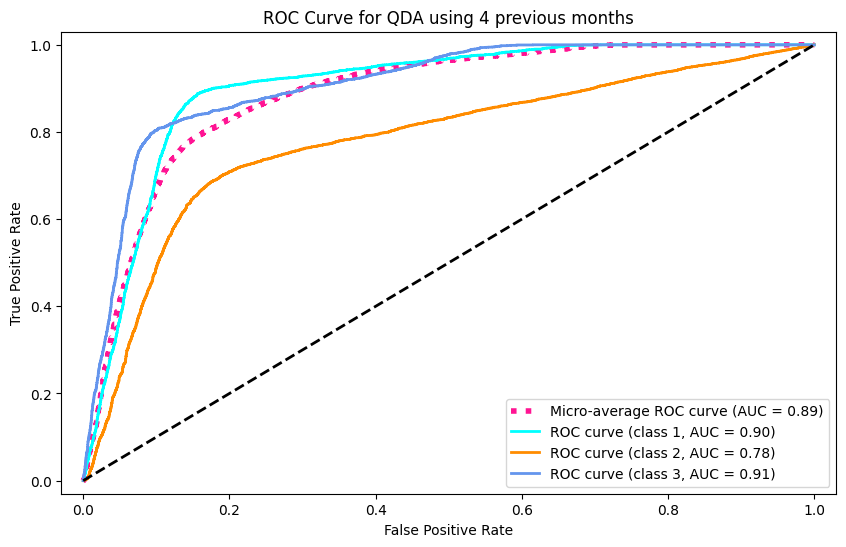

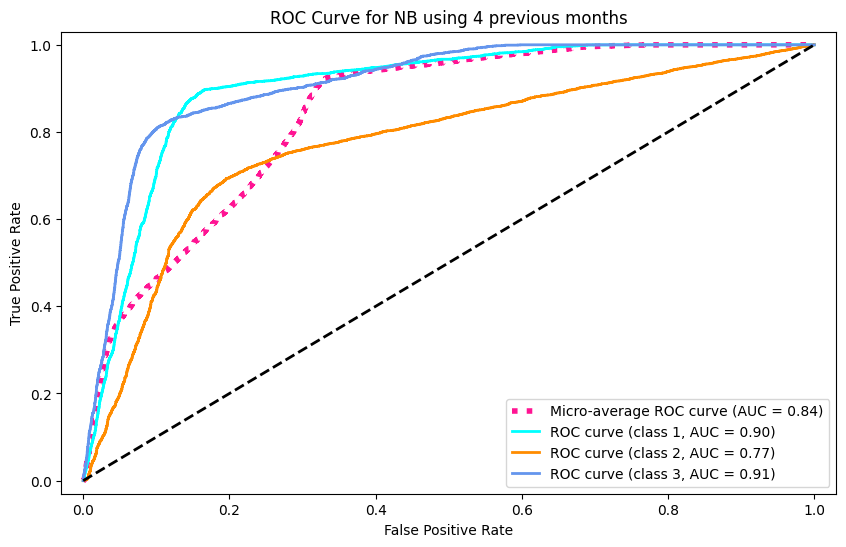

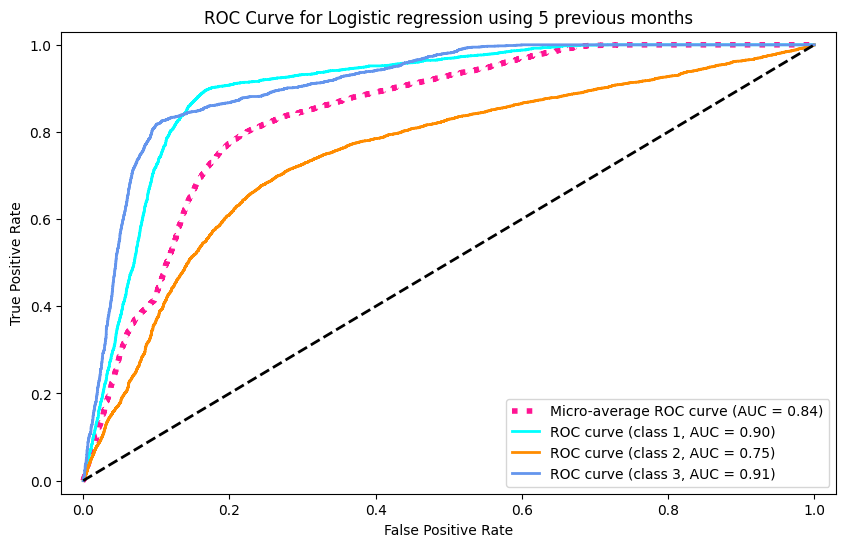

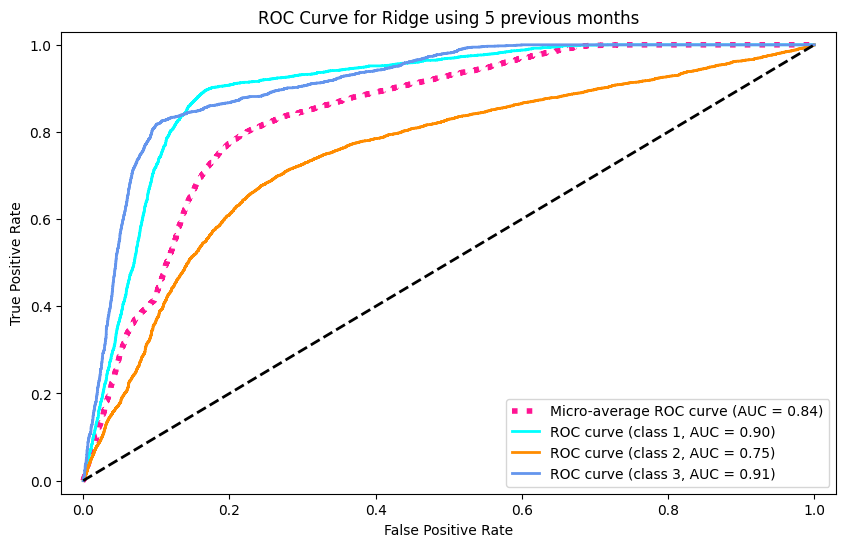

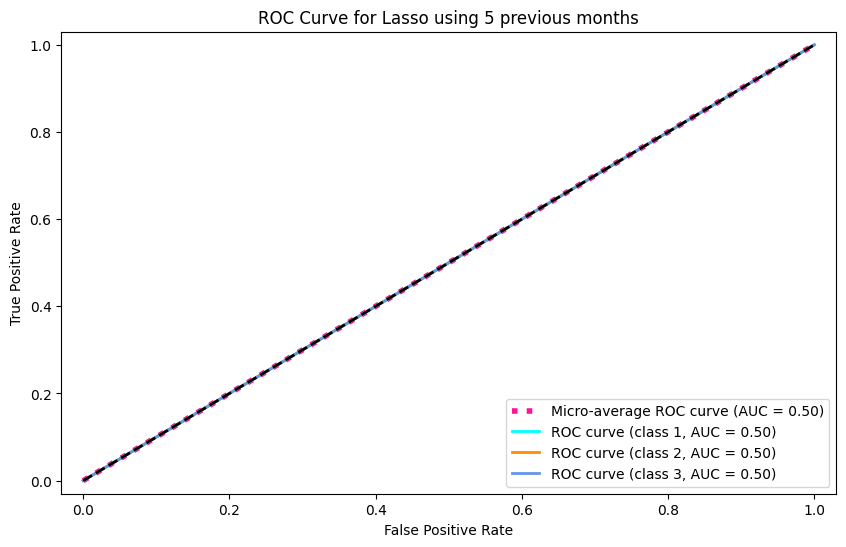

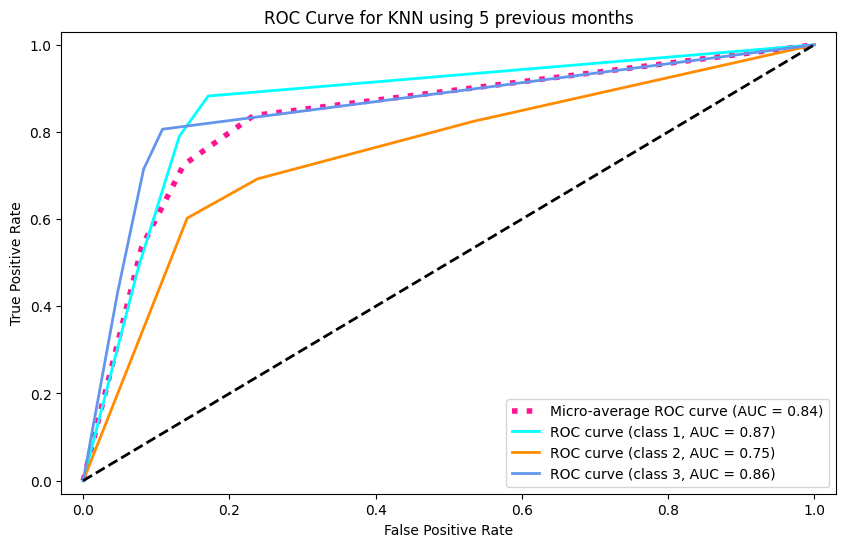

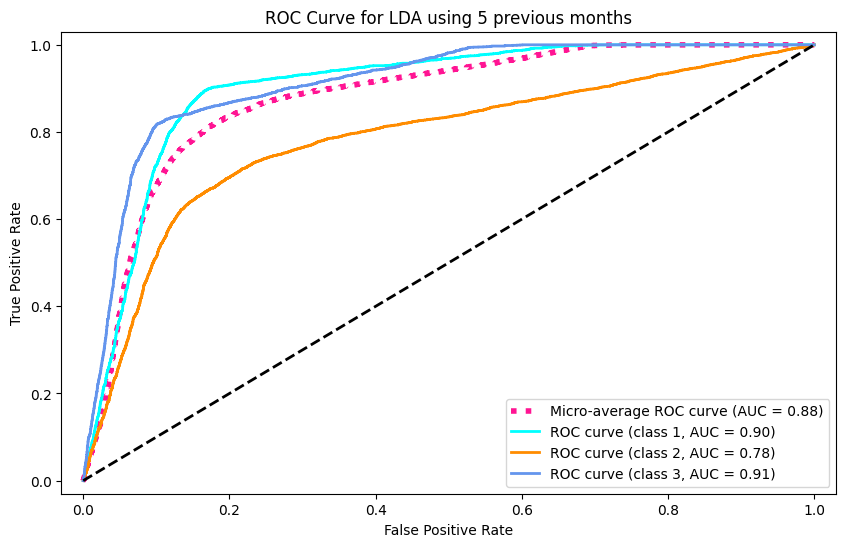

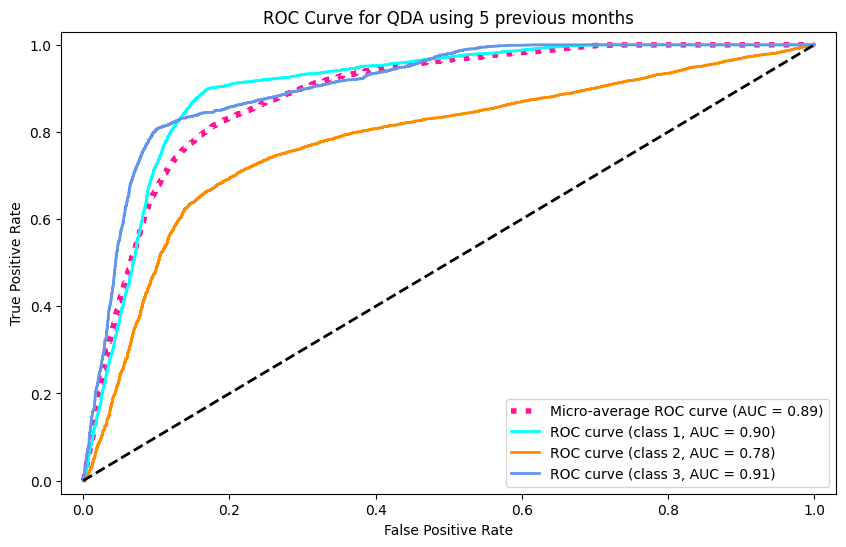

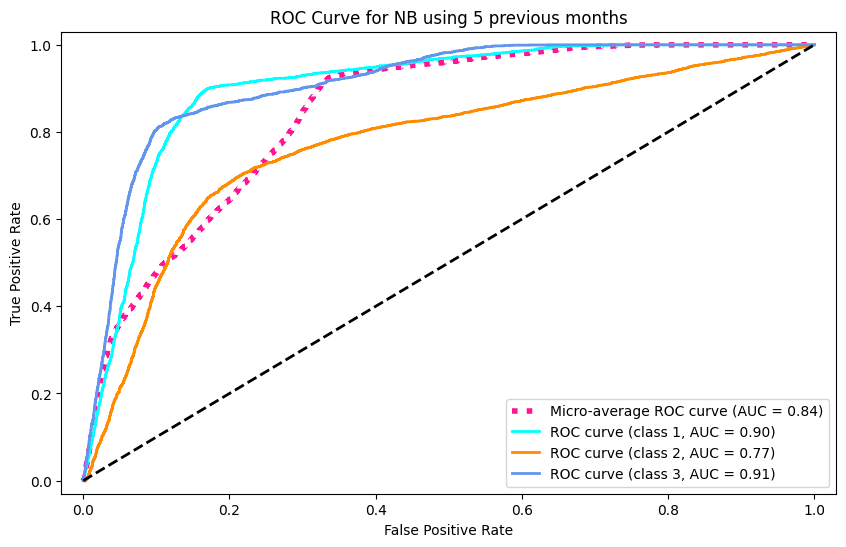

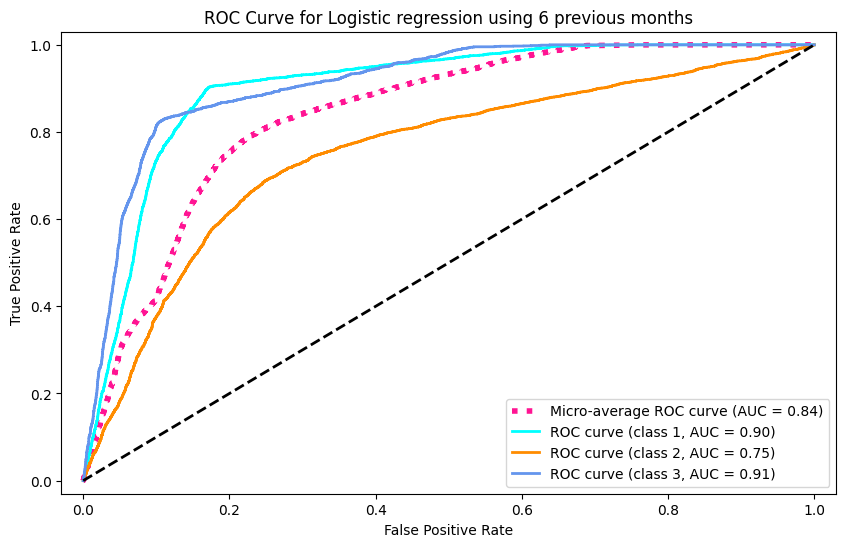

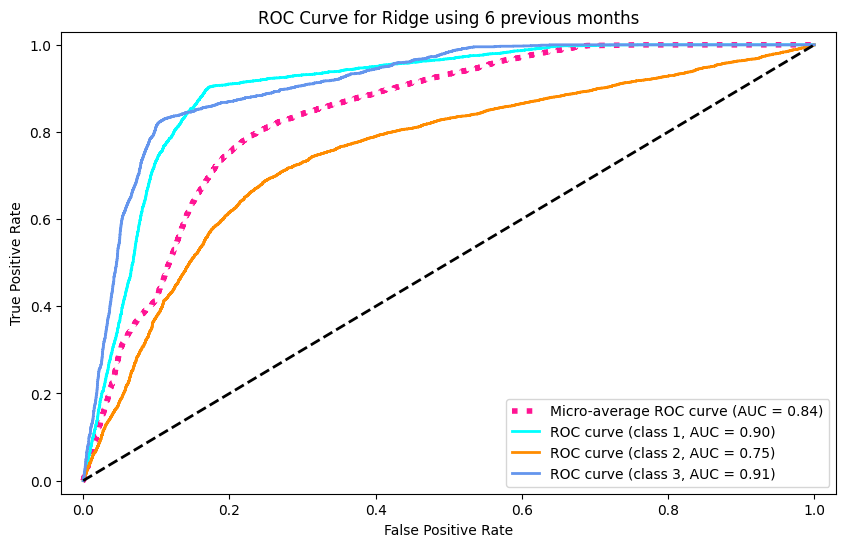

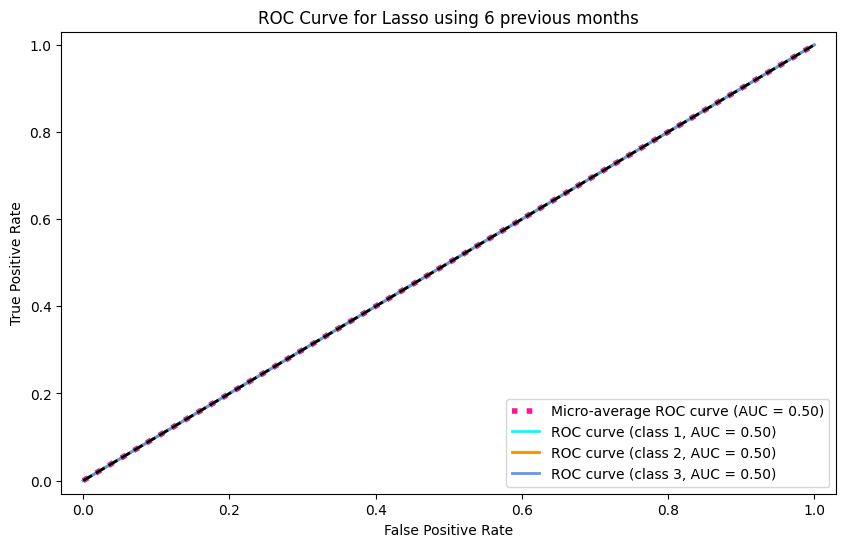

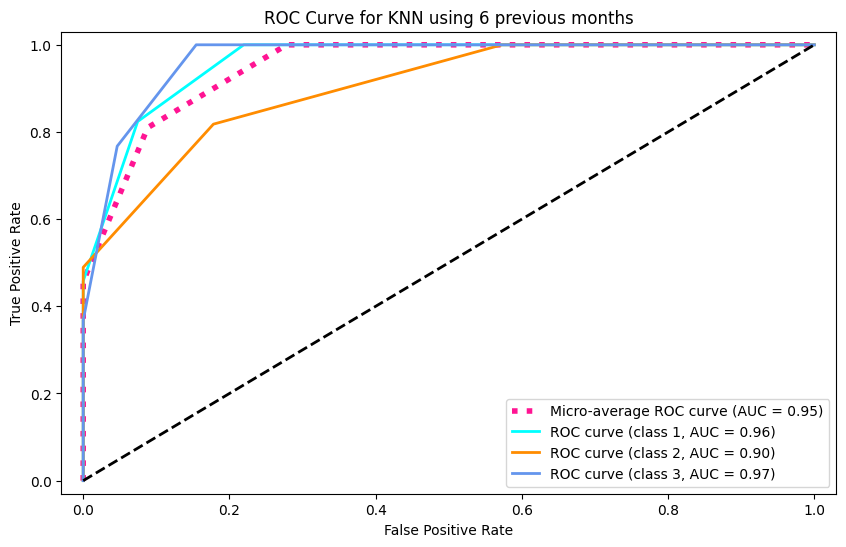

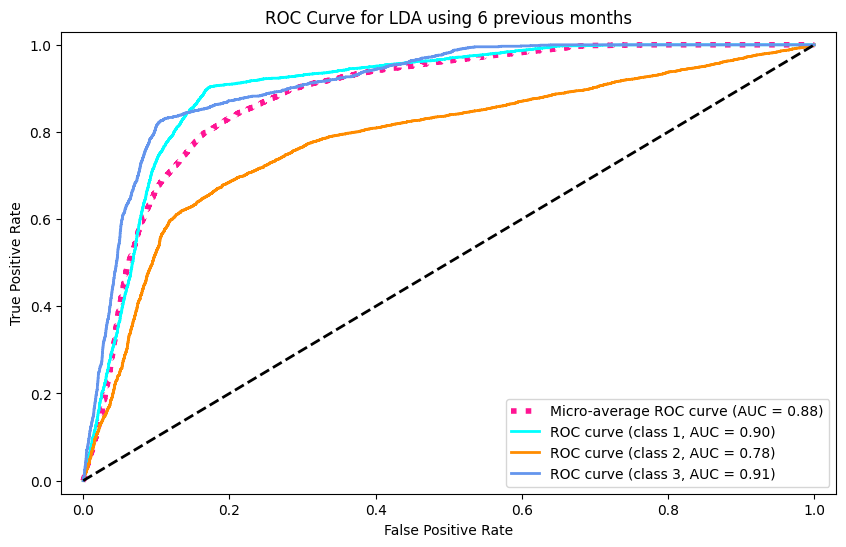

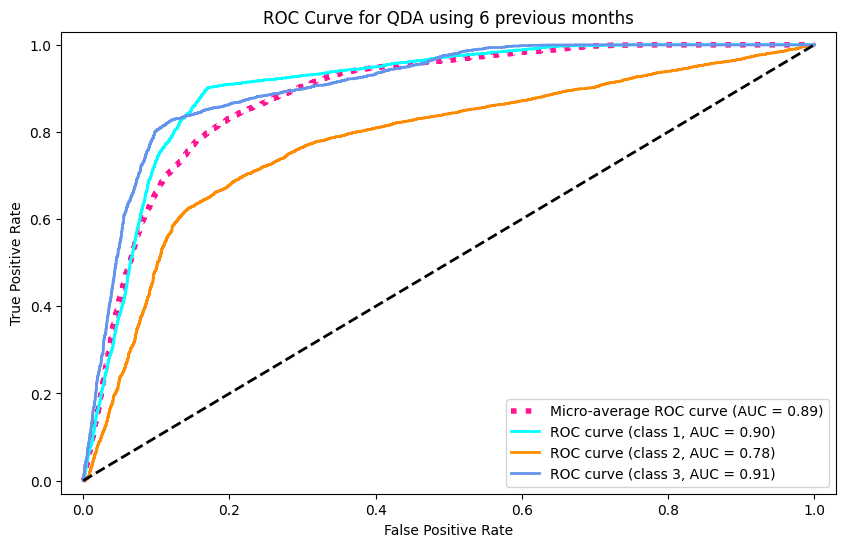

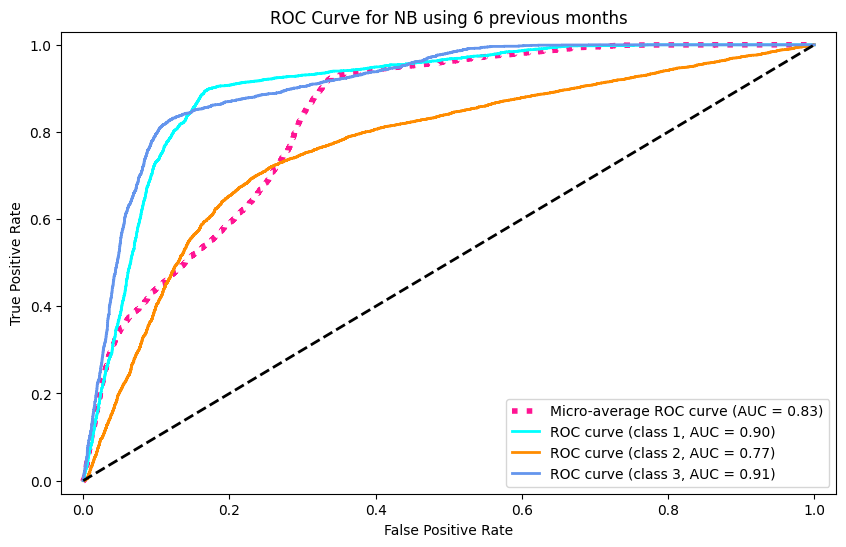

In [365]:
for i in range(len(prev_months_to_pred)):
    for j in range(len(model_names)):
        roc(X_val_ds[i], y_val_ds[i], models[i][j], num_classes, classes, model_names[j], prev_months_to_pred[i])